In [11]:
import matplotlib.pyplot as plt
from models import SciNet
import numpy as np
import torch
import pandas as pd
import seaborn as sns


In [ ]:
size = 200
size_ = 150
n = 3
scinet = SciNet(size,1,n,100)
scinet.load_state_dict(torch.load("trained_models/scinet1.dat"))
t_max = 5
t = np.linspace(0, t_max, size)
min_fr, max_fr = 0, 5
fr = np.random.uniform(min_fr, max_fr, size_)
start_st, end_st = 0.01, 100
st = np.logspace(np.log10(start_st), np.log10(end_st), size_, endpoint = True)
act = {}
for i in range(n):
    act[f'act{i}'] = []
def f(t, st, fr):
    return st**2 * fr * (1 - t/st - np.exp(-t/st))
for st_ in st:
    for fr_ in fr:
        example = list(f(t, st_, fr_))
        t_pred = np.random.uniform(0, t_max)
        example.append(t_pred)

        example_tensor = torch.Tensor([example]).reshape(1, -1)
        results = scinet.forward(example_tensor)

        latent_layer = scinet.mu.detach().numpy()[0]
        for i in range(n):
            act[f"act{i}"].append((st_,fr_, latent_layer[i]))

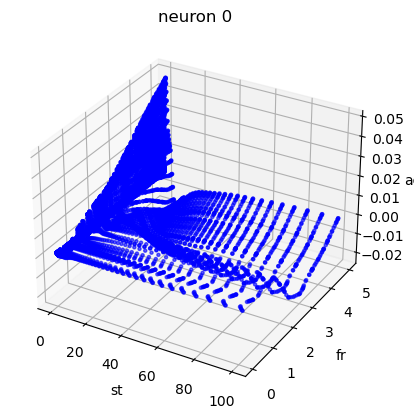

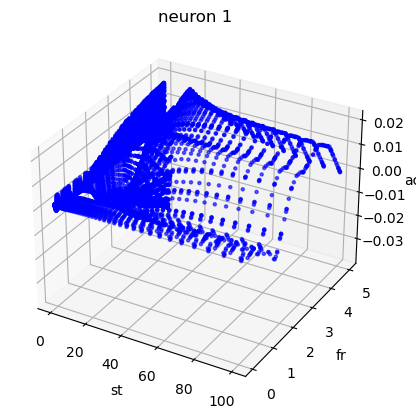

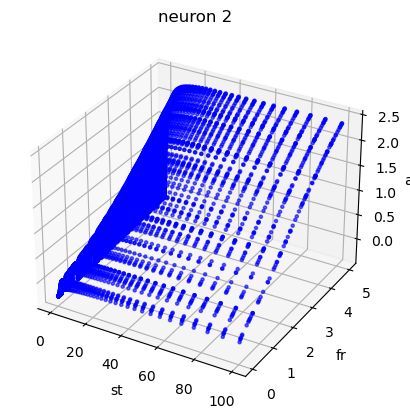

In [5]:
for i in range(n):
    x = [point[0] for point in act[f"act{i}"]]
    y = [point[1] for point in act[f"act{i}"]]
    z = [point[2] for point in act[f"act{i}"]]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='b', marker='.', alpha=0.6, linewidth = 1)

    # Customize labels and title
    ax.set_xlabel('st')
    ax.set_ylabel('fr')
    ax.set_zlabel('act')
    ax.set_title(f'neuron {i}')
    plt.savefig(f'neuron {i}.pdf')
    # Show the plot
    plt.show()


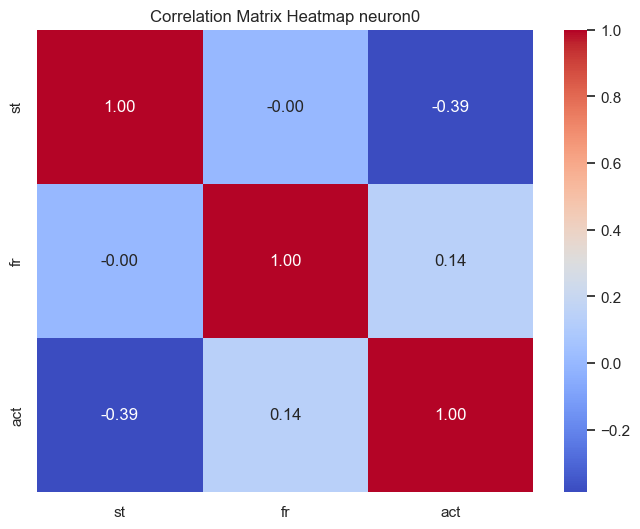

<Figure size 640x480 with 0 Axes>

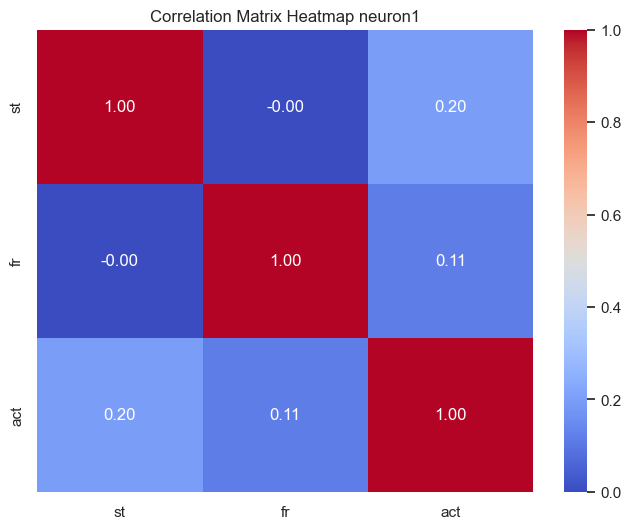

<Figure size 640x480 with 0 Axes>

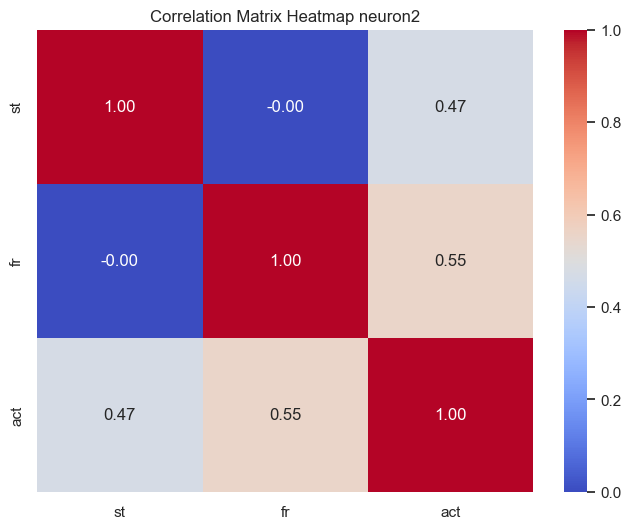

<Figure size 640x480 with 0 Axes>

In [10]:
for i in range(n):
     st__ = [point[0] for point in act[f"act{i}"]]
     fr__ = [point[1] for point in act[f"act{i}"]]
     act_ = [point[2] for point in act[f"act{i}"]]
     data_matrix = np.column_stack((st__, fr__, act_))
     correlation_matrix = np.corrcoef(data_matrix, rowvar=False)
     sns.set(style='white')
     plt.figure(figsize=(8, 6))
     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
               xticklabels=['st', 'fr', 'act'], yticklabels=['st', 'fr', 'act'])
     plt.title(f'Correlation Matrix Heatmap neuron{i}')
     plt.show()
     plt.savefig(f'heatmap neuron {i}.pdf')
